In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl
import requests
import json


C:\Users\loves\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
salary = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Salary%20Data.csv')

In [3]:
salary

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [4]:
salary.head(5)

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [5]:
salary.tail(5)

,Experience Years,Salary
35,9.0,105582
36,9.5,116969
37,9.6,112635
38,10.3,122391
39,10.5,121872


In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


In [7]:
salary.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [8]:
salary.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
dtype: bool

In [9]:
salary.isnull().sum()

Experience Years    0
Salary              0
dtype: int64

In [10]:
X = salary[['Experience Years']]
y = salary['Salary']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = reg.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

In [17]:
print("Mean Squared Error:", mse)
print("R 2 Score:", r2)

Mean Squared Error: 31765611.212300055
R 2 Score: 0.8260957382965146


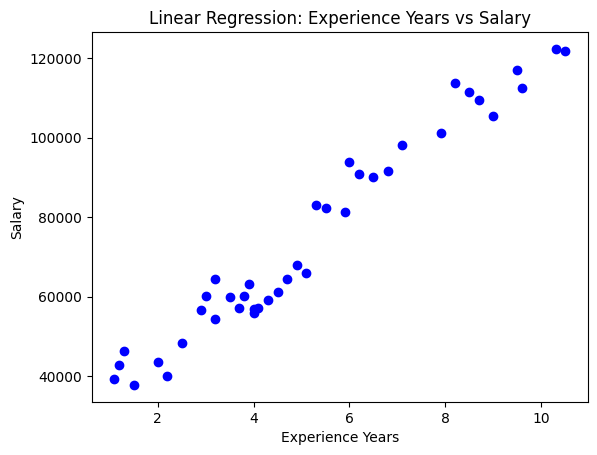

In [18]:
plt.scatter(X, y, color='blue')  # Original data points

plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Linear Regression: Experience Years vs Salary')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


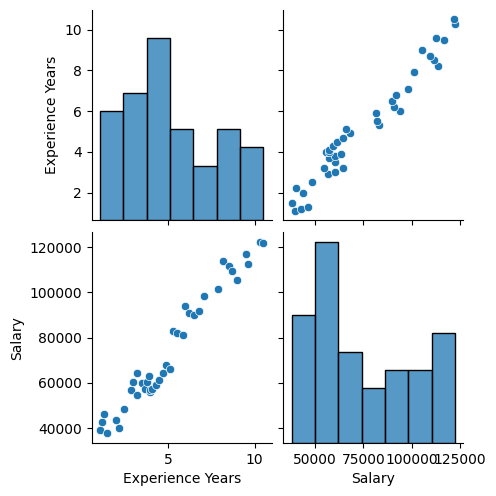

In [19]:
sns.pairplot(data=salary)

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary', ylabel='Count'>

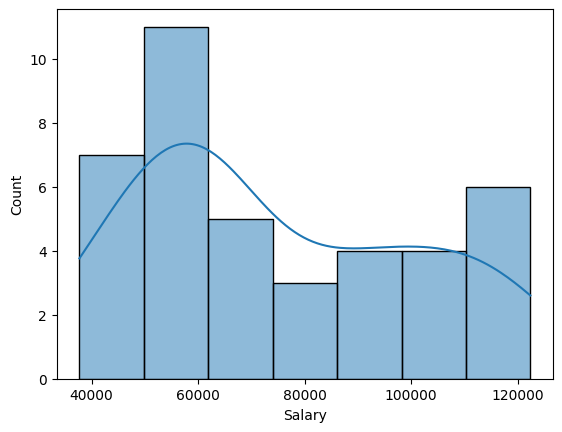

In [20]:
sns.histplot(x=salary['Salary'],kde=True)

In [21]:
pickle.dump(reg,open('model.pkl', 'wb'))

<IPython.core.display.Javascript object>

In [22]:
model = pickle.load(open('model.pkl','rb'))

<IPython.core.display.Javascript object>

In [25]:
print(model.predict([[1.8]]))

[43242.74399698]


C:\Users\loves\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
